In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from model.MatrixClassifier import MatrixClassifier
from model.MatrixTransfer import OracleTransReg
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

## **Mnist**

In [2]:
# fetch datasets
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = np.load("./data/mnist/data.npy")
y = np.load("./data/mnist/label.npy")
# print("Shape of the X: ",X.shape)

### **Binary Class Test**

Only fetch Letter `0` and `2` to do classification

In [3]:
# fetch 0 and 1
letterA, letterB = 0, 8
X_use = X[(y == letterA) | (y == letterB)]
y_use = y[(y == letterA) | (y == letterB)]
# transform into int
y_use[y_use == letterA] = 0
y_use[y_use == letterB] = 1
print("Numer of Samples: ",len(X_use))

Numer of Samples:  184


In [4]:
# split samples into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.4, random_state=2022)
# do scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# tranform into matrix
X_train = X_train.reshape((len(X_train),28,28))
X_test = X_test.reshape((len(X_test),28,28))

Text(0.5, 1.0, 'Letter: 1')

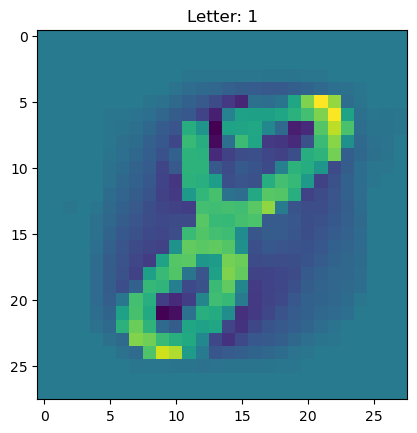

In [5]:
# show image
plt.imshow(X_train[0])
plt.title("Letter: " + str(y_train[0]))

### **Nesterov Matrix Lasso**

train accuracy: 1.0000
test accuracy: 0.9595
rank of the coef: 11


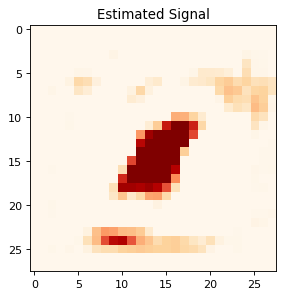

In [6]:
model_mc = MatrixClassifier(_lambda=0.01)
model_mc.fit(X_train,y_train)
print("train accuracy: %.4f"%(model_mc.score(y_train,model_mc.predict(X_train))))
print("test accuracy: %.4f"%(model_mc.score(y_test,model_mc.predict(X_test))))
print("rank of the coef: %d"%(np.sum(model_mc.singular_vals > 0) / model_mc.n_class))
model_mc.show_signal()

### **Lasso Logistic**

train accuracy: 1.0000
test accuracy: 0.9730
rank of the coef: 14


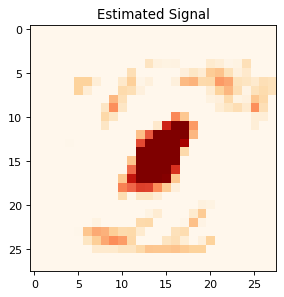

In [7]:
model_mc = MatrixClassifier(_lambda=0.01,penalty="lasso")
model_mc.fit(X_train,y_train)
print("train accuracy: %.4f"%(model_mc.score(y_train,model_mc.predict(X_train))))
print("test accuracy: %.4f"%(model_mc.score(y_test,model_mc.predict(X_test))))
print("rank of the coef: %d"%(np.sum(model_mc.singular_vals > 0) / model_mc.n_class))
model_mc.show_signal()

### **Multi-Class Test**

In [3]:
# split samples into training and testing
y_use = y.copy()
# y_use[y == 3] = 1
# y_use[y != 3] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y_use, test_size=0.4, random_state=2022)
# do scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# tranform into matrix
X_train = X_train.reshape((len(X_train),28,28))
X_test = X_test.reshape((len(X_test),28,28))

train accuracy: 0.9350
test accuracy: 0.8550


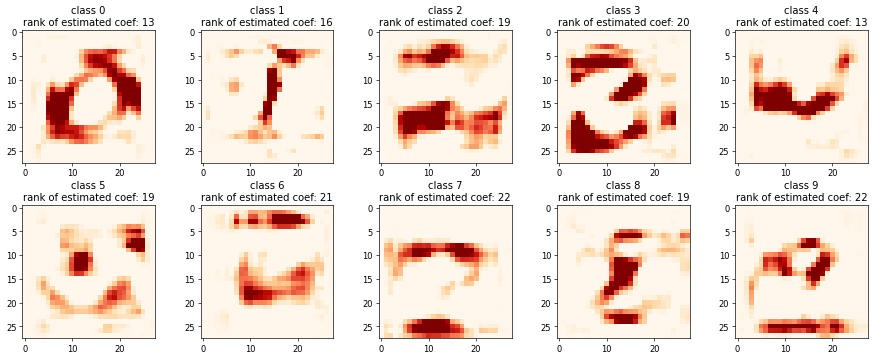

In [4]:
model_mc = MatrixClassifier(_lambda=0.05,multi_class="multinomial")
model_mc.fit(X_train,y_train)
print("train accuracy: %.4f"%(model_mc.score(y_train,model_mc.predict(X_train))))
print("test accuracy: %.4f"%(model_mc.score(y_test,model_mc.predict(X_test))))
# print("rank of the coef: %d"%(np.sum(model_mc.singular_vals > 0)))
model_mc.show_signal(2,5)

train accuracy: 0.9483
test accuracy: 0.8175


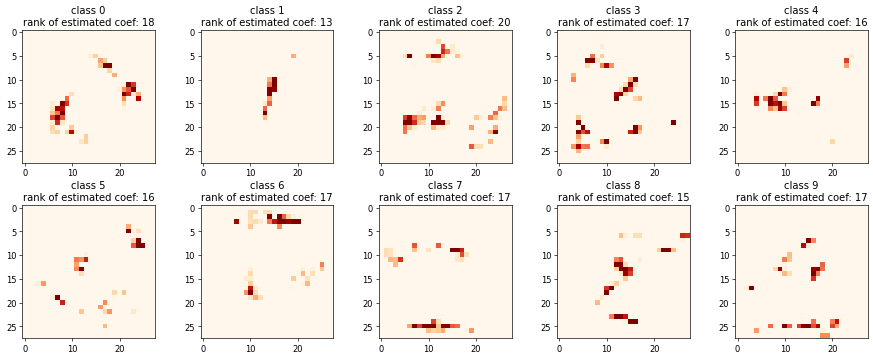

In [5]:
model_mc = MatrixClassifier(_lambda=8,penalty="lasso")
model_mc.fit(X_train,y_train)
print("train accuracy: %.4f"%(model_mc.score(y_train,model_mc.predict(X_train))))
print("test accuracy: %.4f"%(model_mc.score(y_test,model_mc.predict(X_test))))
# print("rank of the coef: %d"%(np.sum(model_mc.singular_vals > 0)))
model_mc.show_signal(2,5)

### **Simulate Transfer**

In [4]:
X_target, X_source, y_target, y_source = X_test, [X_train], y_test, [y_train]
A = [0]
model = OracleTransReg(task="classification")

train accuracy: 0.9033
test accuracy: 0.9475


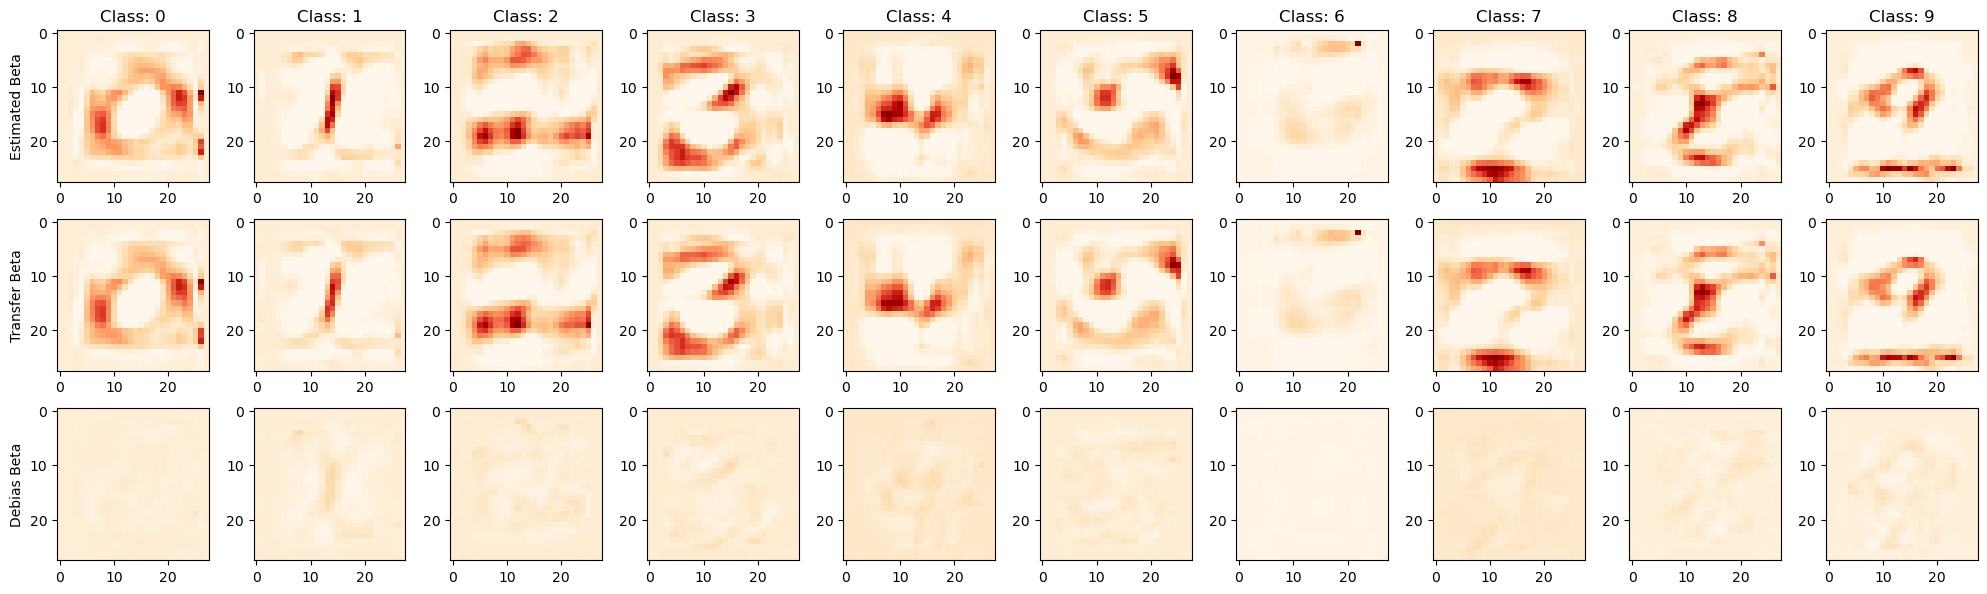

In [15]:
model1, model2 = model.fit(
    X_target,y_target,X_source,y_source,A,
    penalty_transfer="nuclear",penalty_debias="lasso",
    lambda_transfer=0.05,lambda_debias=0.5,
    multi_class="multinomial")
print("train accuracy: %.4f"%(model.score(y_train,model.predict(X_train))))
print("test accuracy: %.4f"%(model.score(y_test,model.predict(X_test))))
model.show_transfer_coef(rmin=0.1,rmax=1)

train accuracy: 0.7950
test accuracy: 0.8400


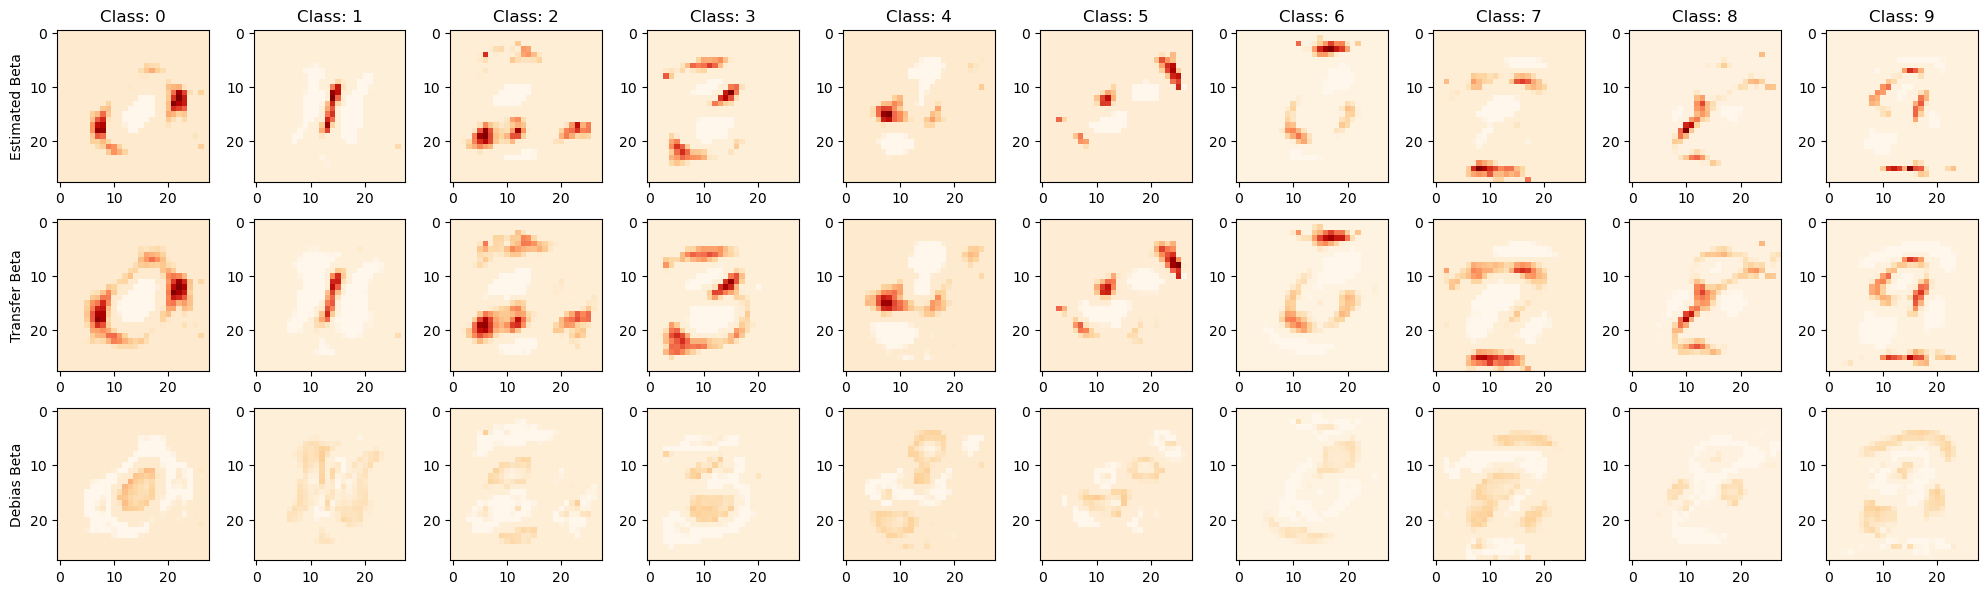

In [14]:
model1, model2 = model.fit(
    X_target,y_target,X_source,y_source,A,
    penalty_transfer="lasso",penalty_debias="lasso",
    lambda_transfer=20,lambda_debias=20,
    multi_class="multinomial")
print("train accuracy: %.4f"%(model.score(y_train,model.predict(X_train))))
print("test accuracy: %.4f"%(model.score(y_test,model.predict(X_test))))
model.show_transfer_coef(rmin=0.1,rmax=1)

train accuracy: 0.9083
test accuracy: 0.9325


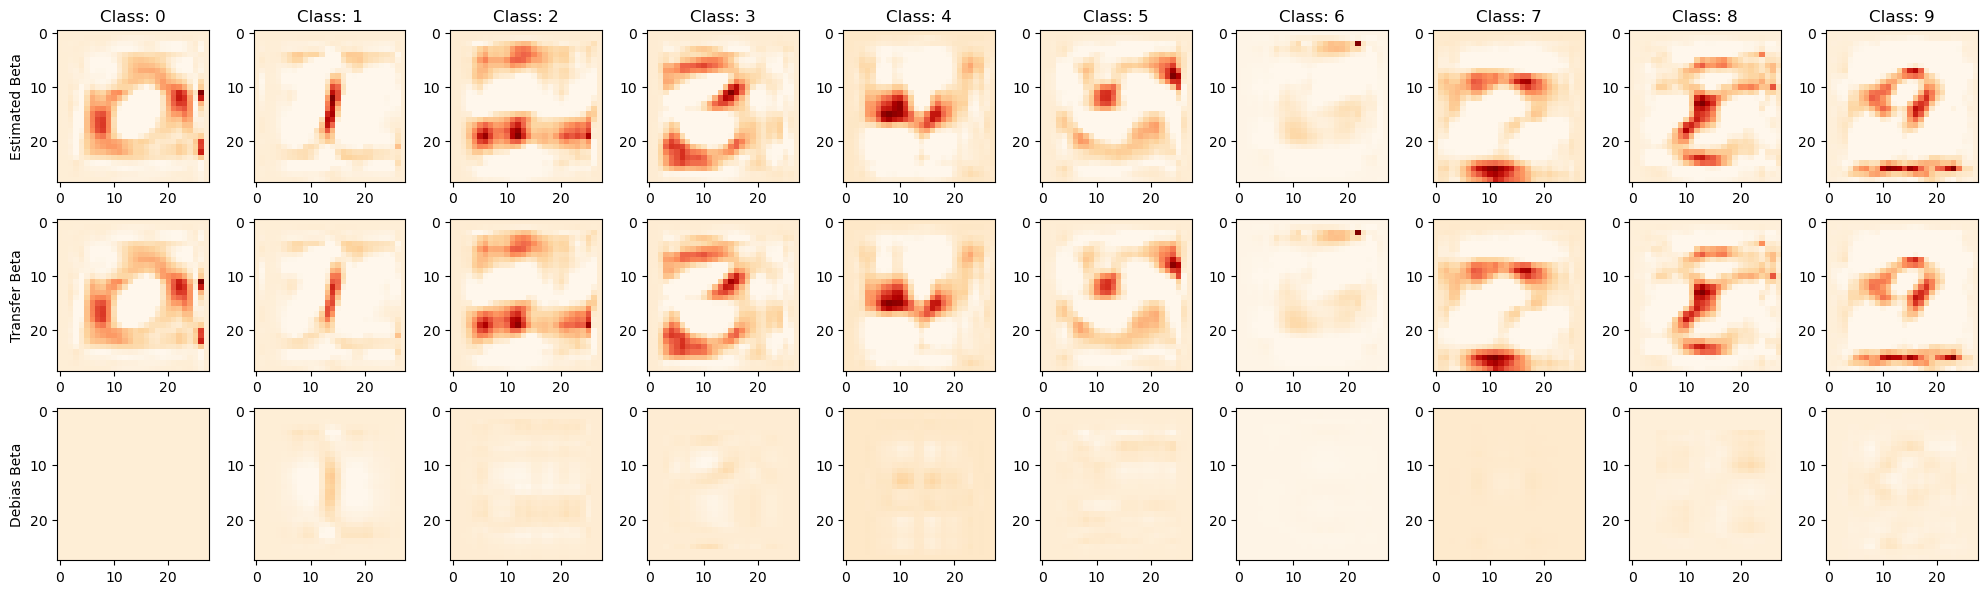

In [16]:
model1, model2 = model.fit(
    X_target,y_target,X_source,y_source,A,
    penalty_transfer="nuclear",penalty_debias="nuclear",
    lambda_transfer=0.05,lambda_debias=0.05,
    multi_class="multinomial")
print("train accuracy: %.4f"%(model.score(y_train,model.predict(X_train))))
print("test accuracy: %.4f"%(model.score(y_test,model.predict(X_test))))
model.show_transfer_coef(rmin=0.1,rmax=1)

train accuracy: 0.8317
test accuracy: 0.9200


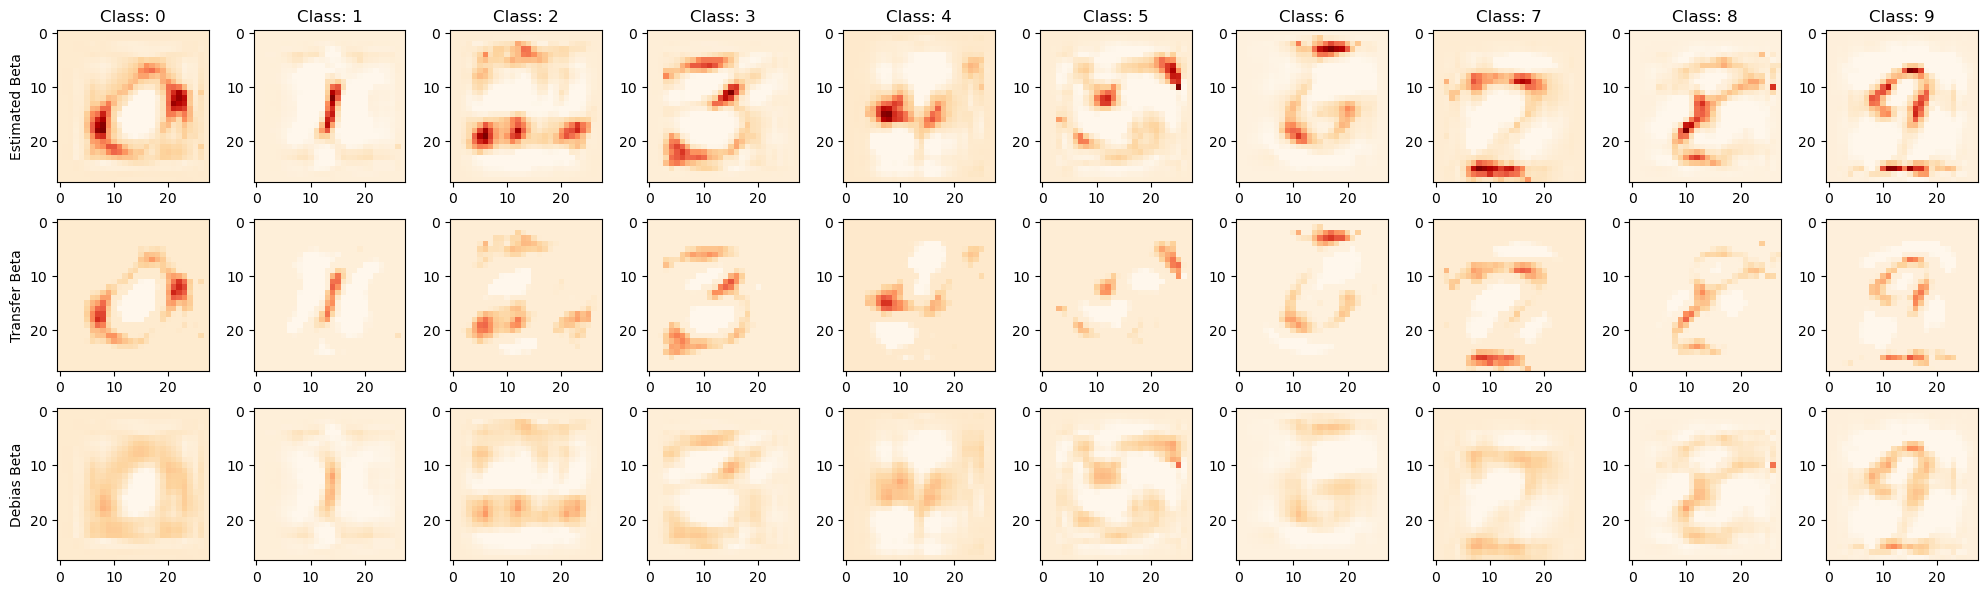

In [18]:
model1, model2 = model.fit(
    X_target,y_target,X_source,y_source,A,
    penalty_transfer="lasso",penalty_debias="nuclear",
    lambda_transfer=20,lambda_debias=0.05,
    multi_class="multinomial")
print("train accuracy: %.4f"%(model.score(y_train,model.predict(X_train))))
print("test accuracy: %.4f"%(model.score(y_test,model.predict(X_test))))
model.show_transfer_coef(rmin=0.1,rmax=1)